Évaluation Comparative des Modèles de Régression pour Optimiser la Prévision des Montants de Financement Participatif

Contexte : Notre entreprise souhaite améliorer la précision de ses prévisions concernant les montants de financement participatif obtenus. Pour cela, nous avons besoin d'une analyse approfondie et comparative des différents modèles de régression disponibles.

Objectif : Évaluer et comparer plusieurs modèles de régression afin de déterminer celui qui offre la meilleure performance pour prédire les montants de financement participatif.


Re-contexttualisation de la mission

Le but de notre étude consiste à améliorer la précision des prévisions des montants de financement participatif d’une  entreprise dans le crowfunding. Pour parvenir à une telle réalisation, nous utiliserons des modèles de régression afin d’optimiser  des montants de financement participatif.

Importation des bibliothèques pour notre étude de données

In [4]:
# importation de la base de données
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold

Importation de la base de données

In [5]:
# importation de la base de données
unknowndata= pd.read_excel(r'c:\Users\ARMIDE Informatique\Desktop\Projet Informatique\Base Crowdfunding_2.xlsx')
unknowndata #affichage des données du jeu de données

,ID_des entreprises,Chiffres d'affaires (en milliers d'€),Montant de financement participatif (en milliers d'€),Type de financement,Revenus nets (en milliers d'€)
0,1,200,55,equity crowdfunding,400
1,2,400,37,reward crowdfunding,500
2,3,500,76,crowdlending,700
3,4,500,35,reward crowdfunding,350
4,5,270,15,equity crowdfunding,500
5,6,400,27,reward crowdfunding,500
6,7,300,15,crowdlending,430
7,8,700,40,reward crowdfunding,780
8,9,210,23,equity crowdfunding,300
9,10,250,12,crowdlending,430


Traitement de la base de données

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 5 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   ID_des entreprises                                      44 non-null     int64 
 1   Chiffres d'affaires (en milliers d'€)                   44 non-null     int64 
 2   Montant de financement participatif  (en milliers d'€)  44 non-null     int64 
 3   Type de financement                                     44 non-null     object
 4   Revenus nets  (en milliers d'€)                         44 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.8+ KB
Le jeu de données comporte 0 doublons


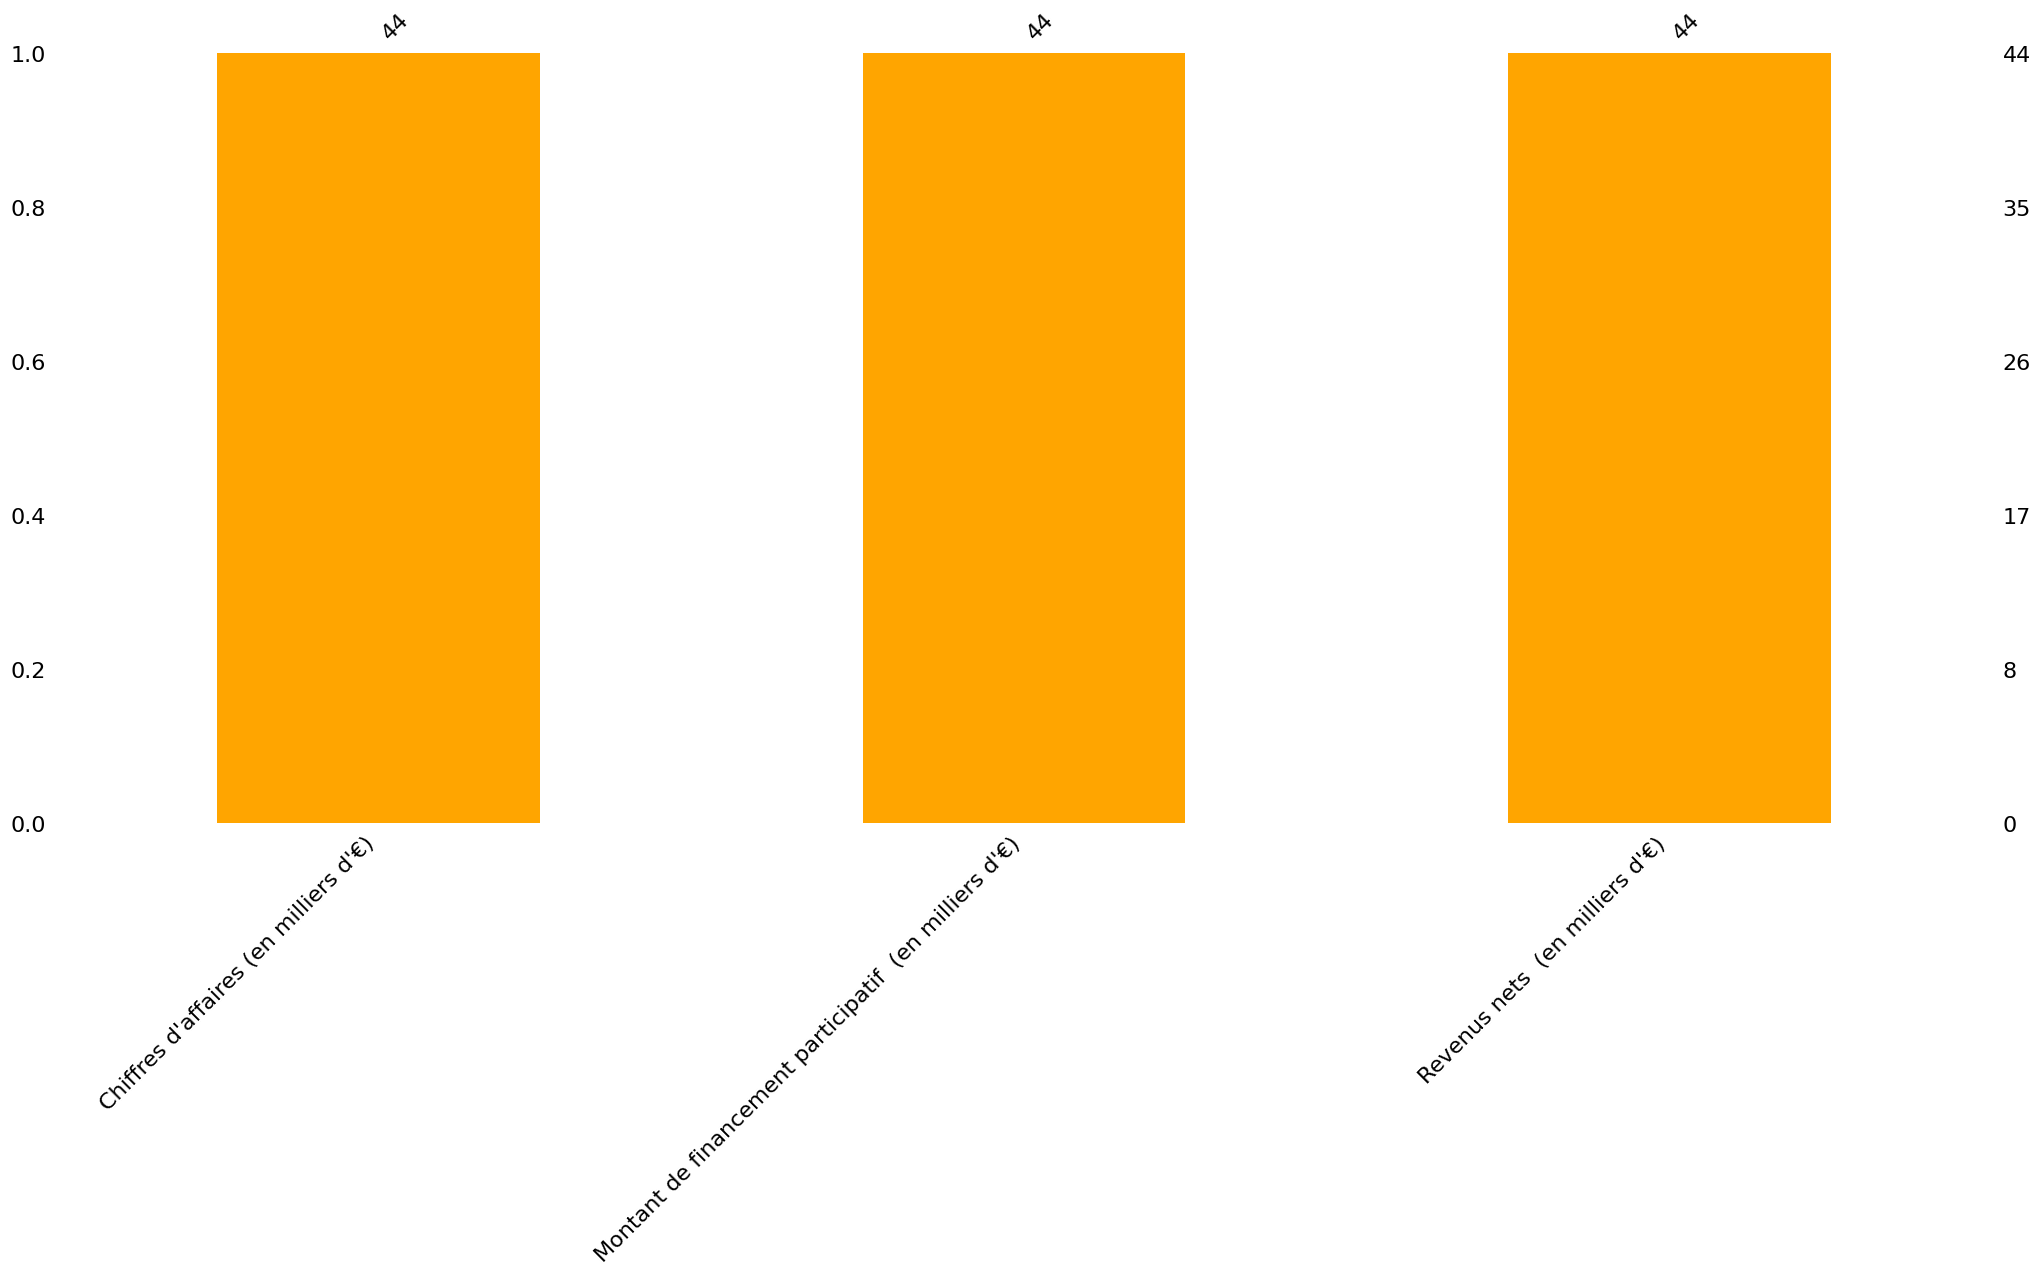

In [7]:
#résumé sur le dataset
infodata=unknowndata.info()
infodata #afficher les résumés sur la base de données

#suppression de certaines variables inutiles pour notre modelisation
unknowndata = unknowndata.drop(columns=['ID_des entreprises','Type de financement  ']) 
unknowndata

#afficher les valeurs manquantes
msno.bar(unknowndata, color='orange')

#afficher les doublons
duplicatedata= unknowndata.duplicated().sum()
print ( "Le jeu de données comporte",  duplicatedata, "doublons") 

Le jeu de données founit par l'entreprise contient peu de données. En effet, nous avons eu précisément 43 observations, qui ne contiennent ni des doublons et ni des valeurs manquantes selon le graphique qui affichent les valeurs de chaque variable. De plus, la base de données regorge 03 variables pour l'étude, il s'agit : 

    de la variable "chiffre d'affaire" qui contient le chiffre d'affaire qu'à réaliser cette entreprise le mois passé;
    de la variabble "revenus nets". Pour le mois passé, elle affirme que cette variable est très importante dans le but de l'aider pour réaliser la prédiction. Ces informations sont recueillies selon le service statistique de l"entreprise, qui s'occupe de  la qualité des données enregistrées au sein de l'entreprise. 
    enfin, de la variable "montant de financement participatif"

Le service stattistique de l'entreprise estime que ces 03 variables sont suffisantes pour notre modelisation. Le temps de confirmer cela, vérifions si la base de de données présente des valeurs extrêmes. 

Détection des outiers dans la base de données


In [8]:
# détection des outliers avec la méthode iqr
Q1 = unknowndata.quantile(0.25)
Q3 = unknowndata.quantile(0.75)
IQR = Q3-Q1
outliers=((unknowndata<(Q1-1.5*IQR))|(unknowndata >(Q3+1.5*IQR)))
valeurs_aberrantes=unknowndata[outliers.any(axis=1)]

# affichage des résultats
print("les valeurs aberrantes sont : ")
valeurs_aberrantes

les valeurs aberrantes sont : 


,Chiffres d'affaires (en milliers d'€),Montant de financement participatif (en milliers d'€),Revenus nets (en milliers d'€)
19,980,200,990
25,978,210,995


Les résultats affichés, après la méthode IQR utilisée, montre que les valeurs des lignes 19 et 25 de notre base de données sont des outliers qui pourraient  compromettre  notre modélisation et l'évaluation des performances de notre modèle. Ainsi, pour éviter cela, nous supprimerons ces deux lignes pour augmenter la robustesse de notre modèle.

In [9]:
# suppression des lignes contenant des outliers
unknowndata= unknowndata.drop(valeurs_aberrantes.index)

Statistique descriptive et graphique de la matrice de corrélation


In [11]:
#afficher la statistique
stat=unknowndata.describe()
stat 


,Chiffres d'affaires (en milliers d'€),Montant de financement participatif (en milliers d'€),Revenus nets (en milliers d'€)
count,42.000000,42.000000,42.000000
mean,523.809524,67.476190,633.452381
std,246.027288,29.057754,214.026805
min,200.000000,12.000000,300.000000
25%,341.250000,46.250000,462.500000
50%,456.500000,67.000000,627.500000
75%,756.250000,89.750000,800.000000
max,987.000000,125.000000,999.000000


<Axes: >

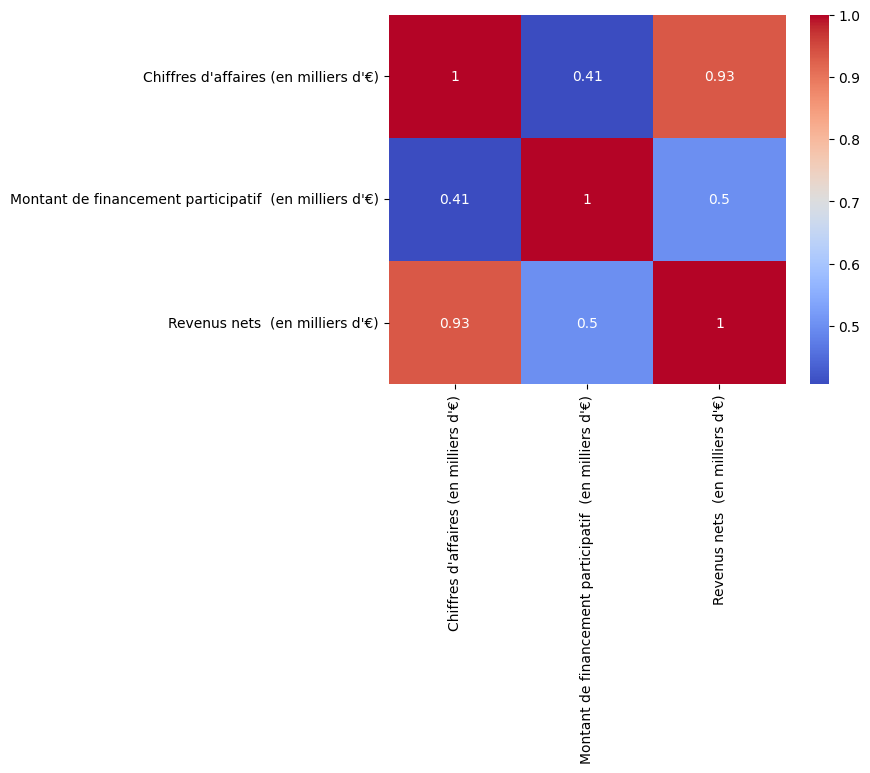

In [12]:
#matrice de corrélation
corree= unknowndata.corr()

#afficher la matrice de corrélation sous forme graphique
sns.heatmap(corree, annot=True, cmap='coolwarm')